## Pattern recognition: Lab 7
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid
* Add moments rule to learning equation


In [1]:
import numpy as np
k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))
def tanh(x):
    return np.tanh(x)
def tanh_prime(x):
    #return 1.0 - x**2
    return 1.0 - tanh(x)**2

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


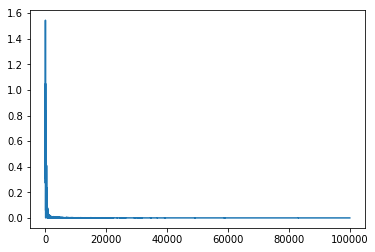

[-1 -1] [ -1.92544877e-05]
[-1  1] [ 0.99994035]
[ 1 -1] [ 0.99991534]
[1 1] [  8.41133635e-05]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
        self.weights = []
        self.err = []
        self.index = []
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        err = []
        index = []
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]  
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l]) 
                    activation = self.activation(dot_value)  
                    a.append(activation)
            index.append(k)
            error = y[i] - a[-1]   
            err.append(abs(error))
            deltas = [error * self.activation_prime(a[-1])]
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            if k % 10000 == 0: 
                print('epochs:', k)       
        plt.plot(index, err)
        plt.show()
    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)))     
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
if __name__ == '__main__':
    nn = NeuralNetwork([2,2,1])
    '''X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])'''
    X = np.array([[-1, -1],
                  [-1, 1],
                  [1, -1],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

epochs: 0


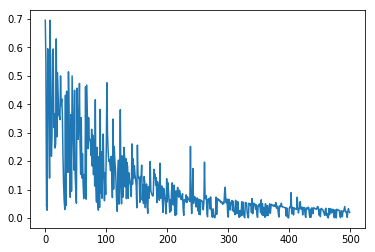

[-1 -1] [ 0.00250714]
[-1  1] [ 0.96805752]
[ 1 -1] [ 0.97786392]
[1 1] [ 0.01564335]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
        self.weights = []
        self.err = []
        self.index = []
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        err = []
        index = []
        for k in range(500):
            i = np.random.randint(X.shape[0])
            a = [X[i]]  #activation list 
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l]) #input * weight
                    activation = self.activation(dot_value)  # activation = xi * wi
                    a.append(activation)
            index.append(k)
            error = y[i] - a[-1]
            err.append(abs(error))
            deltas = [error * self.activation_prime(a[-1])]
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            if k % 10000 == 0: 
                print('epochs:', k)               
        plt.plot(index, err)
        plt.show()
    def predict(self, x):   
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    '''X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])'''
    X = np.array([[-1, -1],
                  [-1, 1],
                  [1, -1],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

epochs: 0


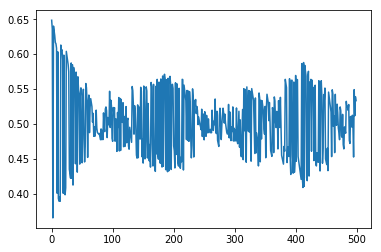

[-1 -1] [ 0.50709365]
[-1  1] [ 0.50409109]
[ 1 -1] [ 0.4723949]
[1 1] [ 0.46796258]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork:
    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
        self.weights = []
        self.err = []
        self.index = []
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        err = []
        index = []
        for k in range(500):
            i = np.random.randint(X.shape[0])
            a = [X[i]]  #activation list 
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l]) #input * weight
                    activation = self.activation(dot_value)  # activation = xi * wi
                    a.append(activation)
            index.append(k)
            error = y[i] - a[-1]   
            err.append(abs(error))
            deltas = [error * self.activation_prime(a[-1])]
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            if k % 10000 == 0: 
                print('epochs:', k)
        plt.plot(index, err)
        plt.show()
    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)))      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
if __name__ == '__main__':
    nn = NeuralNetwork([2,2,1])
    X = np.array([[-1, -1],
                   [-1, 1],
                   [1, -1],
                   [1, 1]])
    y = np.array([0, 1, 1, 0])
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


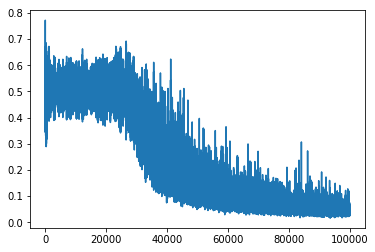

[-1 -1] [ 0.02767471]
[-1  1] [ 0.9486168]
[ 1 -1] [ 0.96273049]
[1 1] [ 0.03706049]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:

    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime
        self.weights = []
        self.err = []
        self.index = []
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)
    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        err = []
        index = []
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]] 
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l]) 
                    activation = self.activation(dot_value)  
                    a.append(activation)
            index.append(k)
            error = y[i] - a[-1]   
            err.append(abs(error))
            deltas = [error * self.activation_prime(a[-1])]
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
            if k % 10000 == 0: 
                print('epochs:', k)
        plt.plot(index, err)
        plt.show()
    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)))      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
if __name__ == '__main__':
    nn = NeuralNetwork([2,2,1])
    '''X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])'''
    X = np.array([[-1, -1],
                  [-1, 1],
                  [1, -1],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))